In [ ]:
import scipy.stats as st
import pandas as pd
import numpy as np
import pylab
import plotly.express as px
import plotly.figure_factory as ff
from scipy.optimize import differential_evolution, minimize

# Критерии согласия

## Задание 1

In [ ]:
df_1 = pd.read_excel('sample_1.xlsx', sheet_name='sample_1.csv')
df_1.columns = ['data']
df_1

,data
0,4.417103e+08
1,4.417094e+08
2,4.417102e+08
3,4.417110e+08
4,4.417093e+08
...,...
114,4.417092e+08
115,4.417126e+08
116,4.417098e+08
117,4.417090e+08


In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
px.histogram(data_frame=df_1, x='data', nbins=len(df_1.data.unique()))

In [ ]:
df_1 = df_1[(df_1.data > 441708600) & (df_1.data < 441711400)]

In [ ]:
px.histogram(data_frame=df_1, x='data', nbins=len(df_1.data.unique()))

Убрали прям конкретные редкости и хвосты

Видим, что распределение похоже на нормальное с уклоном, так что будем использовать тесты на нормальность

Сформулируем гипотезы:
- h0: Данные из выборки принадлежат к нормальному распределению
- h1: Данные из выборки не принадлжежат к нормальному распределению

In [ ]:
alpha = 0.05

### Тест на асимметрию и эксцесс 

In [ ]:
k2, p = st.normaltest(df_1.data)

print("p = {:g}".format(p))

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.0204568
The null hypothesis can be rejected


#### Вывод

По результатам теста данные не принадлежат к нормальному распределению

### Тест колмогорова-смирнова

Используем нормальное распределение для теста

In [ ]:
D, p = st.kstest(df_1.data, st.norm.rvs(loc=df_1.mean(), scale=df_1.std(), size=119))

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
p

The null hypothesis cannot be rejected


0.13634295573146982

#### Вывод

По результатам теста, выборка относится к нормальному распределению

### Тест Шапиро-Уилка

In [ ]:
stat, p= st.shapiro(df_1.data)

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


#### Вывод

По результатам теста, выборка не относится к нормальному распрделению

### Вывод по заданию 1

Хоть выборка и похожа на нормальное распределение с большим смещением среднего в сторону, но по результатам тестов Шапиро-Уилка и теста на ассиметрию и эксцесс, она не является нормальной. Однако по тесту Колмогорова-Смирного она является нормальной

## Задание 2

In [ ]:
df_2 = pd.read_excel('sample_2.xlsx')
df_2.columns = ['data']
df_2

,data
0,411127.15
1,411641.13
2,411148.10
3,411170.68
4,411375.71
...,...
114,411141.63
115,411648.38
116,411388.17
117,411148.56


In [ ]:
px.histogram(df_2, nbins=119)

На гистограмме видно, что распределение скорее всего экспоненциальное

In [ ]:
group_labels = ['distplot']
ff.create_distplot([df_2.data.values.tolist()], group_labels)

### Данное распределение

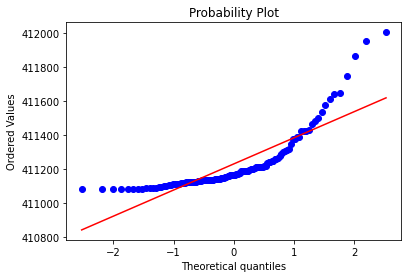

In [ ]:
st.probplot(df_2.data, dist="norm", plot=pylab)
pylab.show()

### Экспоненциальное распределение

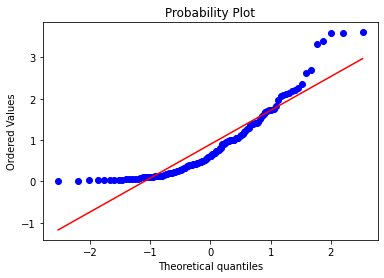

In [ ]:
st.probplot(st.expon.rvs(size=120), dist="norm", plot=pylab)
pylab.show()

### Логнормальное распределение

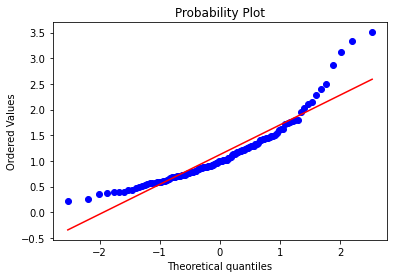

In [ ]:
st.probplot(st.lognorm.rvs(s=0.5, size=120), dist="norm", plot=pylab)
pylab.show()

### Равномерное

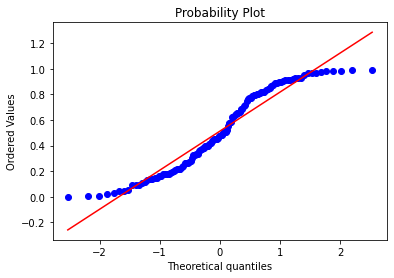

In [ ]:
st.probplot(st.uniform.rvs(size=120), dist="norm", plot=pylab)
pylab.show()

### Распределение Коши

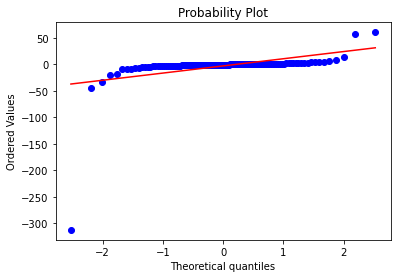

In [ ]:
st.probplot(st.cauchy.rvs(size=120), dist="norm", plot=pylab)
pylab.show()

### Распределение Лапласа

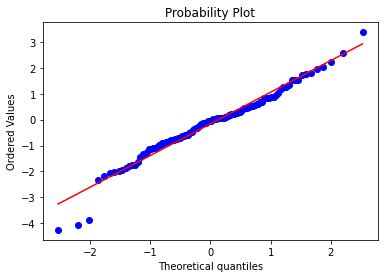

In [ ]:
st.probplot(st.laplace.rvs(size=120), dist="norm", plot=pylab)
pylab.show()

### Распределение пауссона

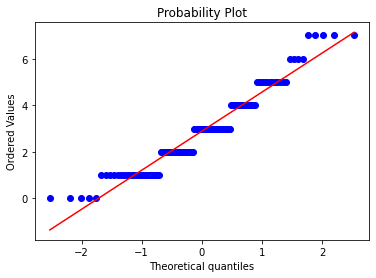

In [ ]:
st.probplot(st.poisson.rvs(mu=3, size=120), dist="norm", plot=pylab)
pylab.show()

### Проверка гипотиз

Больше всего квантиль график данного распределения похож на экспоненциальное распределение, сформируем гипотизы

- h0: данные из выборки принадлежат экспоненциальному распределению
- h1: данные из выборки не принадлежат экспоненциальному распределению

Используем метод полного правдоподобия для нахождения параметра экспоненциального распределения

In [ ]:
D, p = st.kstest(df_2.data, st.expon.rvs(loc=df_2.data.mean(), scale=df_2.data.std(), size=150, random_state=67))

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


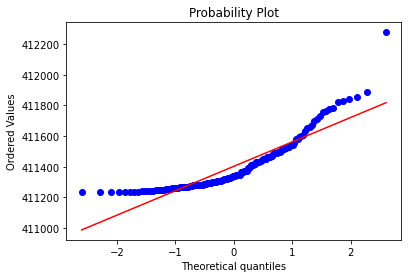

In [ ]:
st.probplot(st.expon.rvs(loc=df_2.data.mean(), scale=df_2.data.std(), size=150, random_state=67), dist="norm", plot=pylab)
pylab.show()

In [ ]:
px.histogram(st.expon.rvs(loc=df_2.data.mean(), scale=df_2.data.std(), size=119, random_state=67), nbins=119)

In [ ]:
px.histogram(df_2, nbins=119)

In [ ]:
df_2.data.mean()

411231.87126050395

In [ ]:
df_2.data.std()

178.32075704315199

In [ ]:
st.expon.rvs(loc=df_2.data.mean(), scale=df_2.data.std(), size=119, random_state=67).mean()

411399.8565017237

In [ ]:
st.expon.rvs(loc=df_2.data.mean(), scale=df_2.data.std(), size=119, random_state=67).std()

179.16309912570287

### Вывод по заданию 2

Хоть на гистограме мы и видем экспоненциальное распределение, но по результатам теста, где мы сравнивали данное распределение с искуственно созданным на основе параметров, полученных из метода полного правдоподобия и грубого оценивания, данное распределение не является экспоненциальным. Хотя итоговая гистограмма искуственно созданного экспоненциального распределения очень похожа на гистограмму данного графика.

# Критерии однородности

## Задание 1

На самом деле задача похожа на очень популярный в статистике A/B анализ, поэтому будем решать задачу в этом стиле

In [ ]:
df_3 = pd.read_excel('sample_3.xlsx').T.iloc[1:]
df_3.columns = ['A', 'B']

In [ ]:
df_3

,A,B
0.0,13.17,17.06
1.0,13.63,14.38
2.0,10.93,17.14
3.0,17.32,9.94
4.0,17.31,18.56
...,...,...
115.0,17.95,9.76
116.0,17.37,12.41
117.0,14.43,15.63
118.0,11.93,11.82


In [ ]:
px.line(df_3)

In [ ]:
px.ecdf(df_3)

In [ ]:
df_3.describe()

,A,B
count,120.000000,120.000000
mean,14.684167,14.796750
std,2.909141,2.946776
min,10.000000,8.220000
25%,12.227500,12.600000
50%,14.315000,14.720000
75%,17.320000,17.117500
max,19.980000,20.050000


Для начала составим гипотезы:
- h0: Терапия оказалась бесполезной
- h1: Терапия оказалась полезной

In [ ]:
print(df_3.A.median(), df_3.B.median())

14.315000000000001 14.719999999999999


In [ ]:
from statsmodels.stats.weightstats import ztest

stat, p = ztest(df_3.A, df_3.B)

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
p

The null hypothesis cannot be rejected


0.7658290491613315

Видим, что в среднем между данными нет большой разницы

### Вывод по заданию 1

Как мы видим по средним и медианам, небольшие улучшения после проведения терапии наблюдаются, однако с точки зрения статистики эти изнмения не имеют статистической значимости.

## Задание 2

In [ ]:
df_4 = pd.read_excel('sample_4.xlsx').T.iloc[1:]
df_4.columns = ['A', 'B']
df_4

,A,B
0.0,103.99,138.46
1.0,54.86,214.81
2.0,152.73,69.14
3.0,225.87,84.63
4.0,50.41,193.08
...,...,...
115.0,149.48,200.68
116.0,102.38,209.69
117.0,81.05,253.03
118.0,174.23,68.48


In [ ]:
px.line(df_4)

In [ ]:
px.ecdf(df_4)

Видим, что распределение вероятностей не особо поменялось, но надо ещё проверить статичстические гипотизы

In [ ]:
df_4.describe()

,A,B
count,120.000000,120.000000
mean,149.340667,152.976667
std,58.907338,58.898270
min,50.290000,52.500000
25%,100.632500,103.080000
50%,148.010000,151.800000
75%,201.512500,206.627500
max,249.430000,256.240000


Зададим гипотизы:
- h0: в среднем цены не поменялись
- h0: в среднем цены поменялись

In [ ]:
stat, p = st.ttest_ind(df_4.A, df_4.B)

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
p

The null hypothesis cannot be rejected


0.6329828397910404

### Вывод по заданию 2

Цены изменились так, что различие не является статичтически значимым\
Ответ: Нет не изменились.